In [37]:
import os
import cv2
import numpy as np
import pandas as pd

from insightface.app import FaceAnalysis

In [38]:
faceapp = FaceAnalysis(name='buffalo_sc',
                       root='models',
                       providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])

faceapp.prepare(ctx_id=0,
                det_size=(640,640),
                det_thresh=0.5)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: models/models/buffalo_sc/det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: models/models/buffalo_sc/w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


/home/glccampos/Downloads/pass/envs/face_reco/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


### Extract facial features and labels

In [39]:
import re

In [40]:
def clean_name(string):
    string = re.sub(r'[^A-Za-z]', ' ', string)
    # string = string.upper()
    return string

In [41]:
person_info = []
list_dir = os.listdir(path='images/')
for folder_name in list_dir:
    role, name = (folder_name.split('-'))
    name = clean_name(name)
    role = clean_name(role)

    # path of each image in respective folder
    img_files = os.listdir(path=f'images/{folder_name}')
    for file in img_files:
        path = f'./images/{folder_name}/{file}'
        # step-1: read the image
        img_arr = cv2.imread(path)

        # step-2: get the info
        result = faceapp.get(img_arr, max_num=1)

        if len(result) > 0:
            # step-3: get facial embeddings
            res = result[0]
            embedding = res['embedding']
            
            # step-4: save all info name, role, embedding in a list
            person_info.append([name, role, embedding])  

In [42]:
data_frame = pd.DataFrame(person_info, columns=['Name', 'Role', 'Facial_Features'])
data_frame

,Name,Role,Facial_Features
0,Chris Evans,student,"[0.44954258, -1.6314547, -0.95116156, -1.54259..."
1,Chris Evans,student,"[0.9714033, -1.7574674, -1.3090365, -1.0256081..."
2,Chris Evans,student,"[1.8046337, -2.301599, -1.5814648, -1.1037462,..."
3,Chris Evans,student,"[-1.1621715, -0.68589675, -0.43853605, -2.8765..."
4,Chris Evans,student,"[1.3115609, -2.0907722, -1.0405229, -1.7980812..."
5,Chris Evans,student,"[0.5908869, -1.415056, -0.6726382, -1.310897, ..."
6,Chris Evans,student,"[0.27377757, -0.8834741, -0.56312096, -0.63476..."
7,Chris Evans,student,"[0.35355112, -0.69770634, -0.30065766, -1.9116..."
8,Chris Evans,student,"[1.7499522, -2.120638, -0.15303323, -0.9053567..."
9,Chris Evans,student,"[0.8585786, -1.1000845, -0.7710812, -1.4918342..."


#### Read test image

In [43]:
img_test = cv2.imread('test_images/test_2.jpeg')
cv2.imshow('test iamge', img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Extract embeddings

In [44]:
res_test = faceapp.get(img_test, max_num=0)
for i, rt in enumerate(res_test):
    print('curent loop =', i)
    bbox = rt['bbox'].astype(int)
    score = int(rt['det_score']*100)
    embed_test = rt['embedding']
    

curent loop = 0


In [45]:
data_frame.head(2)

,Name,Role,Facial_Features
0,Chris Evans,student,"[0.44954258, -1.6314547, -0.95116156, -1.54259..."
1,Chris Evans,student,"[0.9714033, -1.7574674, -1.3090365, -1.0256081..."


In [46]:
X_list = data_frame['Facial_Features'].tolist()
X = np.asarray(X_list)

In [47]:
X.shape

(50, 512)

In [48]:
from sklearn.metrics import pairwise

In [49]:
y = embed_test.reshape(1,-1)

equlidean_distance = pairwise.euclidean_distances(X,y)
manhattan_distance = pairwise.manhattan_distances(X,y)
cosine_similar = pairwise.cosine_similarity(X,y)

In [50]:
data_search = data_frame.copy()
data_search['equlidean_distance'] = equlidean_distance
data_search['manhattan_distance'] = manhattan_distance
data_search['cosine_similar'] = cosine_similar

In [51]:
data_search.head(2)

,Name,Role,Facial_Features,equlidean_distance,manhattan_distance,cosine_similar
0,Chris Evans,student,"[0.44954258, -1.6314547, -0.95116156, -1.54259...",24.786526,450.057995,0.430162
1,Chris Evans,student,"[0.9714033, -1.7574674, -1.3090365, -1.0256081...",24.156301,429.215109,0.374399


In [52]:
import matplotlib.pyplot as plt

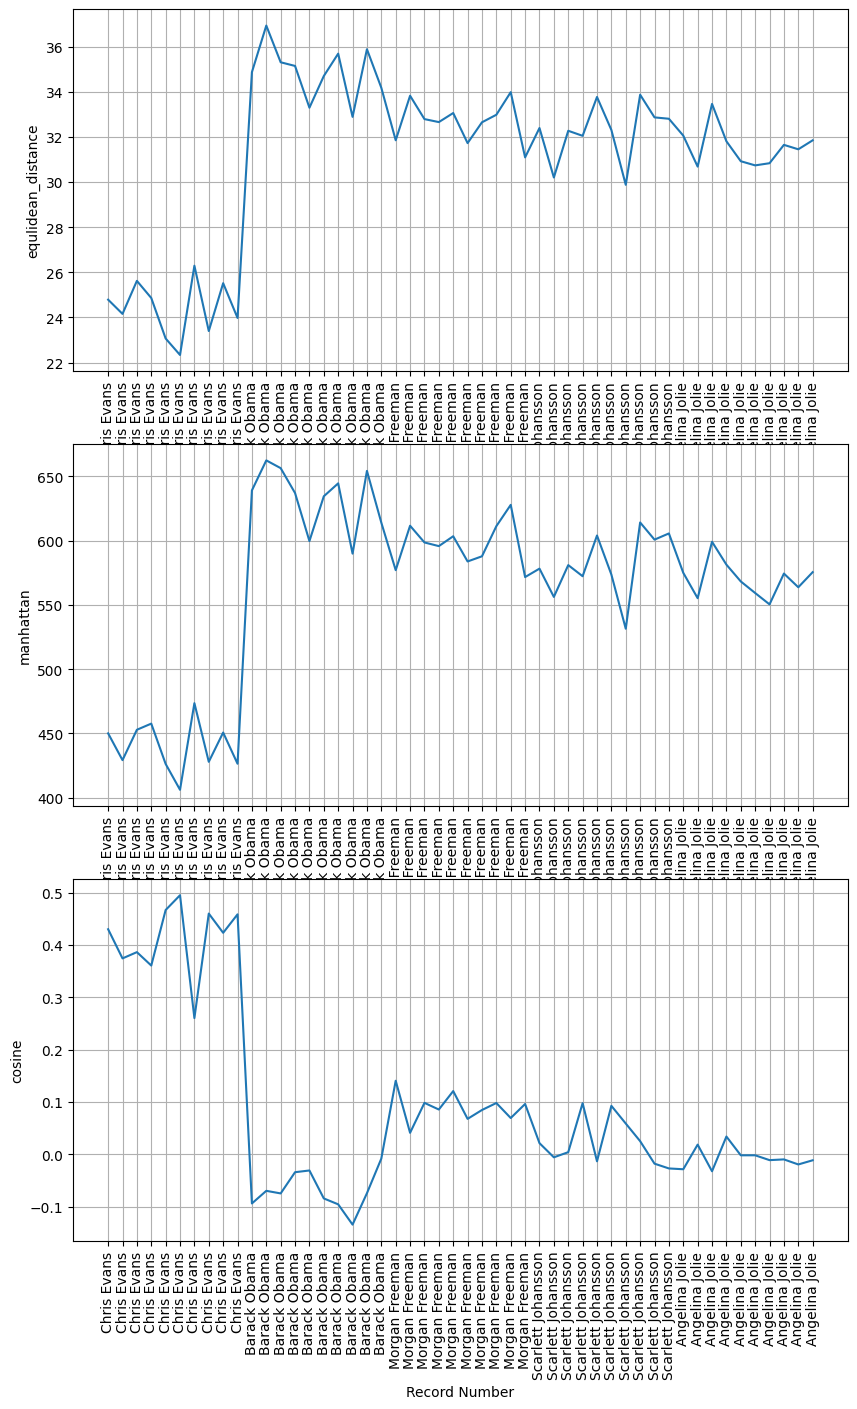

In [53]:
plt.figure(figsize=(10,16))
plt.subplot(3,1,1)
plt.plot(data_search['equlidean_distance'])
plt.xticks(ticks=list(range(len(data_search['equlidean_distance']))),
           labels=data_search['Name'],
           rotation=90)
plt.xlabel('Record Number')
plt.ylabel('equlidean_distance')
plt.grid()

plt.subplot(3,1,2)
plt.plot(data_search['manhattan_distance'])
plt.xticks(ticks=list(range(len(data_search['manhattan_distance']))),
           labels=data_search['Name'],
           rotation=90)
plt.xlabel('Record Number')
plt.ylabel('manhattan')
plt.grid()

plt.subplot(3,1,3)
plt.plot(data_search['cosine_similar'])
plt.xticks(ticks=list(range(len(data_search['cosine_similar']))),
           labels=data_search['Name'],
           rotation=90)
plt.xlabel('Record Number')
plt.ylabel('cosine')
plt.grid()


plt.show()

### Identify person with cosine similarity

In [54]:
s_opt = 0.3

In [55]:
data_filter = data_search.query(f'cosine_similar > {s_opt}')
data_filter.reset_index(drop=True, inplace=True)

if len(data_filter) > 0:
    argmax = data_filter['cosine_similar'].argmax()
    name_sin, role_sin = data_filter.loc[argmax][['Name', 'Role']]

else:
    name_sin = 'Unknown'
    role_sin = 'Unknown'

In [56]:
print(name_sin, role_sin)

Chris Evans student


### Identify multiple people in an image

In [60]:
def ml_search_algorithm(df,
                        feature_column,
                        test_vector,
                        name_role=['Name', 'Role'],
                        thresh=0.5):
    """
    cosine similarity base search algorithm
    """
    # step-1: take the df (data collection)
    dataframe = df.copy()
    # step-2: index face embedding from df and covert into array
    X_list = dataframe[feature_column].tolist()
    x = np.asarray(X_list)

    # step3: calculate cosine similarity
    similar = pairwise.cosine_similarity(x,test_vector.reshape(1,-1))
    similar_arr = np.array(similar).flatten()
    dataframe['cosine'] = similar_arr

    # step-4: filter the data
    data_filter = dataframe.query(f'cosine >= {thresh}')
    if len(data_filter) > 0:
        # step-5: get the person name
        data_filter.reset_index(drop=True, inplace=True)
        argmax = data_filter['cosine'].argmax()
        person_name, person_role = data_filter.loc[argmax][name_role]
    else:
        person_name = 'Unknown'
        person_role = 'Unknown'

    return person_name, person_role
        

In [68]:
test_image = cv2.imread('test_images/test_2.jpeg')
cv2.imshow('test image', test_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [72]:
# step-1: take the test image and apply to insight face
results = faceapp.get(test_image)
test_copy = test_image.copy()

# step-2: use for loop to extract each embedding to feed ml_search_algorithm
for res in results:
    x1, y1, x2, y2 = res['bbox'].astype(int)
    embeddings = res['embedding']
    person_name, person_role = ml_search_algorithm(dataframe_compressed,
                                                   'Facial_Features',
                                                   test_vector=embeddings,
                                                   name_role=['Name', 'Role'],
                                                   thresh=0.5)
    if person_name == 'Unknown':
        color = (0,0,255)
    else:
        color = (0,255,0)
    cv2.rectangle(test_copy, (x1,y1), (x2,y2), color)
    text_gen = person_name
    cv2.putText(test_copy, text_gen, (x1,y1), cv2.FONT_HERSHEY_DUPLEX, 0.5, color, 1)

cv2.imshow('test image', test_copy)
cv2.waitKey()
cv2.destroyAllWindows()

### Compress Dataset

In [71]:
dataframe_compressed = data_frame.groupby(by=['Name', 'Role']).mean()
dataframe_compressed.reset_index(inplace=True)
dataframe_compressed

,Name,Role,Facial_Features
0,Angelina Jolie,student,"[0.43242034, 1.0748498, -0.12862368, -1.833291..."
1,Barack Obama,teacher,"[0.94858104, -0.5584052, 0.094820715, -1.27965..."
2,Chris Evans,student,"[0.7201716, -1.4684149, -0.7781254, -1.4601072..."
3,Morgan Freeman,teacher,"[0.485351, -0.6192554, -0.4069932, 1.0687786, ..."
4,Scarlett Johansson,student,"[0.19131963, -0.48843804, -1.690233, 0.4423967..."


### convert df into array and save in npzip format

In [74]:
xvalues = dataframe_compressed.values
xvalues

array([['Angelina Jolie', 'student',
        array([ 4.32420343e-01,  1.07484984e+00, -1.28623679e-01, -1.83329177e+00,
               -7.27802396e-01, -1.23429465e+00, -2.34313130e-01, -3.72791886e-01,
               -6.96481884e-01, -3.52696568e-01, -1.86347470e-01, -8.56500030e-01,
               -7.25770116e-01,  1.59811723e+00,  1.89706236e-01, -8.70287269e-02,
               -8.61652121e-02,  9.59016234e-02, -4.32294518e-01,  5.76180927e-02,
                1.06183089e-01, -1.08450234e+00, -3.68749052e-01, -3.46378684e-01,
                5.48185408e-01, -3.21397722e-01,  1.65740931e+00,  3.66979241e-01,
                9.40395057e-01,  1.18225420e+00,  4.02732909e-01,  5.15204966e-01,
                2.07558203e+00, -1.63649404e+00, -1.61218062e-01, -9.74149257e-02,
               -7.65306115e-01,  7.55763590e-01, -1.70574975e+00,  2.01980740e-01,
               -1.64433122e+00,  5.47630787e-01,  2.28763938e-01, -3.25343072e-01,
                1.90978810e-01,  3.11371267e-01, -

In [75]:
col_name = np.array(dataframe_compressed.columns)
col_name

array(['Name', 'Role', 'Facial_Features'], dtype=object)

In [76]:
np.savez('dataframe_students_teachers.npz', xvalues, col_name)

### load npzip

In [77]:
file_np = np.load('dataframe_students_teachers.npz', allow_pickle=True)
file_np.files

['arr_0', 'arr_1']

In [80]:
pd.DataFrame(file_np['arr_0'], columns=file_np['arr_1'])

,Name,Role,Facial_Features
0,Angelina Jolie,student,"[0.43242034, 1.0748498, -0.12862368, -1.833291..."
1,Barack Obama,teacher,"[0.94858104, -0.5584052, 0.094820715, -1.27965..."
2,Chris Evans,student,"[0.7201716, -1.4684149, -0.7781254, -1.4601072..."
3,Morgan Freeman,teacher,"[0.485351, -0.6192554, -0.4069932, 1.0687786, ..."
4,Scarlett Johansson,student,"[0.19131963, -0.48843804, -1.690233, 0.4423967..."
